
=== Testing image: ../datasets/ReverseWayBill/reverseWaybill-156387426414724544_1.jpg ===


Preprocessing done.
EasyOCR initialized.


/Users/home/Downloads/shivu/ProjectOCR/.venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)



========== RAW OCR TOKENS (HYBRID) ========== 

[easyocr] KL (conf=0.006773183118840358)
[easyocr] SE I (conf=0.041927747428417206)
[easyocr] 2 (conf=0.1783534845699819)
[easyocr] Dflisciny (conf=0.1136257167914805)
[easyocr] Cjj (conf=0.09780054221082801)
[easyocr] DTO (conf=0.9913898860367412)
[easyocr] Rernarks (conf=0.7845653675032624)
[easyocr] WIA-202 (conf=0.7033648694017093)
[easyocr] R29ZPNG (conf=0.8760608231243879)
[easyocr] Wh (conf=0.6715904070330341)
[easyocr] Havov [ al (conf=0.14059717390004542)
[easyocr] 9360 (conf=0.9884029740940166)
[easyocr] 234093 191049 (conf=0.19428275970351613)
[easyocr] 6tFTAI< (conf=0.04299057803642481)
[easyocr] Jendor (conf=0.34342734877840186)
[easyocr] Narne (conf=0.5497268998890747)
[easyocr] E-way Bill (conf=0.9348522302585919)
[easyocr] t 10 * (conf=0.6559357918890989)
[easyocr] ia (conf=0.06509688420248295)
[easyocr] irk O}' Shaarda Scocl (conf=0.12394016270256245)
[easyocr] Doida F am (conf=0.2842148996134292)
[easyocr] Pura L (conf=

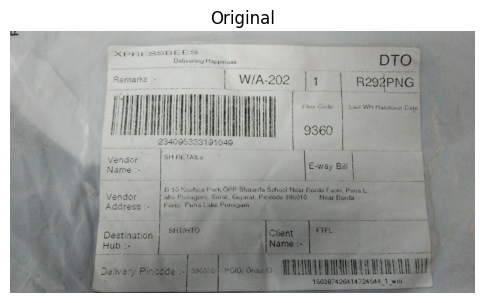

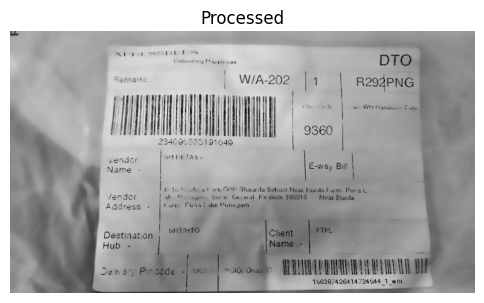

In [1]:
import sys
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

# Make sure src is importable
sys.path.append("../")

from src.preprocessing import Preprocessor
from src.ocr_engine import OCREngine
from src.text_extraction import TextExtractor


# --------------------------------------------------------
# 1. SELECT THE IMAGE TO TEST
# --------------------------------------------------------
img_path = Path("../datasets/ReverseWayBill/reverseWaybill-156387426414724544_1.jpg")
print("\n=== Testing image:", img_path, "===\n")

img = cv2.imread(str(img_path))
if img is None:
    raise Exception("❌ Could not read image.")

plt.figure(figsize=(6,6))
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")


# --------------------------------------------------------
# 2. PREPROCESS
# --------------------------------------------------------
pre = Preprocessor(
    do_denoise=True,
    do_clahe=True,
    do_threshold=False,
    do_sharpen=True,
    do_deskew=False
)

processed = pre.run(img) if hasattr(pre, "run") else pre.run_pipeline(img)

plt.figure(figsize=(6,6))
plt.title("Processed")
plt.imshow(processed if len(processed.shape)==2 else cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
plt.axis("off")

print("\nPreprocessing done.")


# --------------------------------------------------------
# 3. HYBRID OCR (EasyOCR + Tesseract)
# --------------------------------------------------------
ocr = OCREngine(engine="auto")
ocr_results = ocr.recognize(processed)

print("\n========== RAW OCR TOKENS (HYBRID) ========== \n")
for r in ocr_results:
    print(f"[{r['engine']}] {r['text']} (conf={r['confidence']})")


# --------------------------------------------------------
# 4. Extract ID
# --------------------------------------------------------
extractor = TextExtractor()

result = extractor.extract_target(ocr_results)

print("\n========== EXTRACTION RESULT ==========\n")
print("Success:", result["success"])
print("Extracted Text:", result["extracted_text"])
print("Matched Line:", result["matched_line"])

print("\n========== RECONSTRUCTED LINES ==========\n")
for i, line in enumerate(result["all_lines"], start=1):
    print(f"{i}. {line}")

print("\n========== RAW GROUPS ==========\n")
for g in result["raw_groups"]:
    print("\n--- GROUP ---")
    for entry in g:
        print(entry)


In [2]:
extractor = TextExtractor()
result = extractor.extract_target(ocr_results)
print(result["extracted_text"])



166887426414724544_1_mpi


In [3]:
# Debug cell: prints hybrid OCR tokens + bbox info for a chosen image
from pathlib import Path
import cv2, sys
sys.path.append("../")
from src.preprocessing import Preprocessor
from src.ocr_engine import OCREngine
from src.text_extraction import TextExtractor

img_path = Path("../datasets/ReverseWayBill/reverseWaybill-160390797970200578_1.jpg")
img = cv2.imread(str(img_path))
assert img is not None, "Could not read image"

pre = Preprocessor(do_denoise=True, do_clahe=True, do_threshold=False, do_sharpen=True)
processed = pre.run(img) if hasattr(pre, "run") else pre.run_pipeline(img)

ocr = OCREngine(engine="auto")
ocr_results = ocr.recognize(processed)

print("\nHYBRID OCR TOKENS (engine, text, conf, bbox):\n")
for r in ocr_results:
    print(f"[{r['engine']}] '{r['text']}' conf={r['confidence']} bbox={r['bbox']}")

# show only numeric tokens with bbox size info
print("\nNUMERIC TOKENS:\n")
for r in ocr_results:
    t = r['text'].replace(" ", "")
    if t.isdigit():
        xs = [p[0] for p in r['bbox']]; ys = [p[1] for p in r['bbox']]
        w = max(xs)-min(xs); h = max(ys)-min(ys)
        print(f"'{t}'  len={len(t)}  bbox_w={w} bbox_h={h}  aspect={w/(h+1e-6):.1f}  bbox={r['bbox']}")


EasyOCR initialized.

HYBRID OCR TOKENS (engine, text, conf, bbox):

[easyocr] '3|' conf=0.08418135598977308 bbox=[[712, 44], [746, 44], [746, 68], [712, 68]]
[easyocr] 'Godauara' conf=0.5551987617686257 bbox=[[755, 34], [874, 34], [874, 64], [755, 64]]
[easyocr] 'Tis' conf=0.23918263411569468 bbox=[[880, 32], [934, 32], [934, 56], [880, 56]]
[easyocr] 'hs' conf=0.35533219880563244 bbox=[[208, 82], [246, 82], [246, 106], [208, 106]]
[easyocr] 'Shadowia' conf=0.4632475415062512 bbox=[[814, 134], [908, 134], [908, 164], [814, 164]]
[easyocr] 'Riz78512-Z6FPL' conf=0.3548619320058099 bbox=[[467, 153], [640, 153], [640, 191], [467, 191]]
[easyocr] 'AOA' conf=0.5329973123551949 bbox=[[811, 171], [868, 171], [868, 210], [811, 210]]
[easyocr] 'TOYTRETAIL (Seller)' conf=0.914023845063304 bbox=[[206, 214], [459, 214], [459, 268], [206, 268]]
[easyocr] 'School Near' conf=0.9374589821639066 bbox=[[522, 242], [648, 242], [648, 274], [522, 274]]
[easyocr] 'B 10 Krishna Park OPP Shaarda' conf=0.62118